<a href="https://colab.research.google.com/github/shalabs/Predicting-Skin-Sensitization/blob/main/skin_sen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Human Skin Sensitization Potential of Small Molecules using Machine Learning (Models Trained on Biologically Meaningful Descriptors)

Skin sensitizers are substances that, after repeated skin contact, can cause allergic contact dermatitis. Exposure to skin sensitizers must be kept to a minimum in order to prevent the development of skin sensitivity. In order to create functional small molecules that are both safe and effective, it is crucial to be able to detect and predict skin sensitizers.


## installation of packages

In [ ]:
!pip install signaturizer

In [ ]:
!pip install rdkit-pypi

In [ ]:
import pandas as pd

from signaturizer import Signaturizer
import rdkit

## Data Loading

I combined data from two sources (cited below). The data is ...

1- tx0c00383_si_002
Golden, Emily, et al. "The Good, The Bad, and The Perplexing: Structural Alerts and Read-Across for Predicting Skin Sensitization Using Human Data." Chemical research in toxicology 36.5 (2023): 734-746.

2- tx0c00253_si_001
Wilm, Anke, et al. "Skin Doctor CP: conformal prediction of the skin sensitization potential of small organic molecules." Chemical Research in Toxicology 34.2 (2020): 330-344.

In [ ]:
!wget https://github.com/shalabs/Predicting-Skin-Sensitization/blob/main/dataset/tx0c00253_si_001.xlsx
!wget https://github.com/shalabs/Predicting-Skin-Sensitization/blob/main/dataset/tx2c00383_si_002.xlsx


--2023-09-05 18:30:56--  https://github.com/shalabs/Predicting-Skin-Sensitization/blob/main/dataset/tx0c00253_si_001.xlsx
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4454 (4.3K) [text/plain]
Saving to: ‘tx0c00253_si_001.xlsx’

tx0c00253_si_001.xl 100%[===================>]   4.35K  --.-KB/s    in 0s      

2023-09-05 18:30:56 (77.8 MB/s) - ‘tx0c00253_si_001.xlsx’ saved [4454/4454]

--2023-09-05 18:30:56--  https://github.com/shalabs/Predicting-Skin-Sensitization/blob/main/dataset/tx2c00383_si_002.xlsx
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4455 (4.4K) [text/plain]
Saving to: ‘tx2c00383_si_002.xlsx’

tx2c00383_si_002.xl 100%[===================>]   4.35K  --.-KB/s    in 0s      

2023-09-05 18:30:56 (84.4 MB/s) - ‘tx2c00383_

In [ ]:
df_1 = pd.read_excel('tx0c00253_si_001.xlsx', 'Table SI_1',skiprows=2, index_col='Compound ID')


In [ ]:
df_1

,SMILES,CAS No.,EC No.,Name Alves et al.,Name Di et al.,"Source of SMILES, CAS No., EC No., Name",Split,Activity binary,Activity ternary,Activity quinary,New entry (Entry created by spliting a mixture reported as non-sensitizer into two entries)
Compound ID,,,,,,,,,,,
0,O=Cc1ccccc1,100-52-7,NaN,Benzaldehyde,NaN,10.1021/acssuschemeng.7b04220,test set,0,0.0,0.0,False
1,Nc1ccc(Cc2ccc(N)c(Cl)c2)cc1Cl,101-14-4,202-918-9,4-[(4-amino-3-chlorophenyl)methyl]-2-chloroani...,NaN,10.1021/acssuschemeng.7b04220,test set,0,NaN,NaN,False
2,CC(C)Nc1ccc(Nc2ccccc2)cc1,101-72-4,NaN,N-isopropyl-N'-phenyl-p-phenylenediamine,NaN,10.1021/acssuschemeng.7b04220,test set,1,2.0,3.0,False
3,CCCCCCCCCCCC(=O)NCCC[N+](C)(C)C,10595-49-0,234-204-8,3-(dodecanoylamino)propyl-trimethylazanium; me...,NaN,10.1021/acssuschemeng.7b04220,test set,1,NaN,NaN,False
4,CCCCN(c1nc(N(CCCN=c2nc(N(CCCC)C3CC(C)(C)N(C)C(...,106990-43-6,401-990-0,"N4-[3-[[4,6-bis[butyl-(1,2,2,6,6-pentamethylpi...",NaN,10.1021/acssuschemeng.7b04220,test set,1,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...
1280,O=C1N=C(c2ccc(-c3ccccc3)cc2)c2c(O)[nH]c(-c3ccc...,NaN,NaN,NaN,"3-(biphenyl-4-yl)-6-(4-chlorophenyl)-2,5-dihyd...",10.1016/j.tiv.2019.01.004,training set,0,0.0,0.0,False
1281,Cc1cnn(C(CC(=O)O)C(=O)O)c1C,NaN,NaN,NaN,"2-(3,4-dimethyl-1H-pyrazol-1-yl)succinic acid",10.1016/j.tiv.2019.01.004,training set,0,0.0,0.0,False
1282,O=C(O)CCC(=O)O,110-15-6,NaN,Succinic acid,Amber Acid,10.1016/j.tiv.2019.01.004 + 10.1021/acssuschem...,training set,0,0.0,0.0,False


The processed training set consists of 1021 compounds and the test set of 257 compounds.

In [ ]:
df_2 = pd.read_excel('tx2c00383_si_002.xlsx', 'Supplemental Table 2', index_col=None)


In [ ]:
df_2

,CASRN,Chemical Name,SMILES,CID,Sensitization Status,WOE Call
0,2305-05-7,gamma-Dodecalactone,CCCCCCCCC1CCC(=O)O1,16821.0,Inactive,Single
1,2349-07-7,Hexyl isobutyrate,CCCCCCOC(=O)C(C)C,16872.0,Inactive,Single
2,2442-10-6,Oct-1-en-3-yl acetate,CCCCCC(OC(=O)C)C=C,17121.0,Inactive,Mixed
3,2556-10-7,[2-(1-Ethoxyethoxy)ethyl]benzene,CCOC(C)OCCc1ccccc1,102849.0,Inactive,Unanimous
4,3608-11-5,"Ethanone, 1-(4,7,7-trimethylbicyclo[4.1.0]hept...",CC(=O)C1CC2C(C=C1C)C2(C)C,44079.0,Inactive,Unanimous
...,...,...,...,...,...,...
1351,92-48-8,Methyl coumarin,c12c(oc(=O)cc2)ccc(c1)C,7092.0,Inactive,NaN
1352,69430-24-6,Cyclomethicone,[Si](O*)(*)(C)C,24771.0,Inactive,NaN
1353,2634-33-5,Benzisothiazolinone,c1ccc2c(c1)c(=O)[nH]s2,17520.0,Active,NaN
1354,91-64-5,Coumarin,c12c(ccc(o1)=O)cccc2,323.0,Active,NaN


In [ ]:
df_2 = df_2[df_2['SMILES'].notna()]

In [ ]:
signa1 = Signaturizer('A1')

We might want to describe out molecules by multiple point of view using different descriptors.
A *global* signature consists of stacking all the bioactivity spaces described by the Chemical Checker, this is convinient when we want a rich general purpose descriptor.

In [ ]:
sign = Signaturizer('GLOBAL', verbose=False)


In [ ]:
smiles = df_2.SMILES.unique()

In [ ]:
results = sign.predict(smiles, 'preds3.h5')



Parsing SMILES: 1355it [00:00, 7972.77it/s]
Generating signatures:   0%|          | 0/11 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


Generating signatures:   9%|▉         | 1/11 [00:02<00:29,  2.91s/it]

1/1 [==============================] - 1s 644ms/step


Generating signatures:  18%|█▊        | 2/11 [00:04<00:18,  2.03s/it]

1/1 [==============================] - 1s 679ms/step


Generating signatures:  27%|██▋       | 3/11 [00:06<00:15,  1.91s/it]

1/1 [==============================] - 0s 408ms/step


Generating signatures:  36%|███▋      | 4/11 [00:08<00:13,  1.97s/it]

1/1 [==============================] - 0s 366ms/step


Generating signatures:  45%|████▌     | 5/11 [00:09<00:10,  1.71s/it]

1/1 [==============================] - 0s 367ms/step


Generating signatures:  55%|█████▍    | 6/11 [00:10<00:07,  1.46s/it]

1/1 [==============================] - 0s 366ms/step


Generating signatures:  64%|██████▎   | 7/11 [00:11<00:05,  1.39s/it]

1/1 [==============================] - 0s 352ms/step


Generating signatures:  73%|███████▎  | 8/11 [00:12<00:03,  1.26s/it]

1/1 [==============================] - 0s 379ms/step


Generating signatures:  82%|████████▏ | 9/11 [00:13<00:02,  1.16s/it]

1/1 [==============================] - 0s 373ms/step


Generating signatures:  91%|█████████ | 10/11 [00:14<00:01,  1.11s/it]

1/1 [==============================] - 1s 933ms/step


Generating signatures: 100%|██████████| 11/11 [00:16<00:00,  1.52s/it]


In [ ]:
results.signature.shape

(1355, 3200)

In [ ]:
c1=pd.DataFrame(results.signature).iloc[: , :128]
c1

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.082195,0.044052,0.075272,0.101513,0.095285,0.003330,-0.101519,-0.101441,0.041075,0.100636,...,0.101255,0.098743,0.080876,-0.051391,0.013836,0.086906,0.099237,0.101506,-0.101447,0.097213
1,-0.026374,0.093729,0.095775,0.095795,0.095746,0.090457,-0.095818,-0.095610,0.092675,0.095751,...,0.095799,0.095672,-0.087557,0.043290,0.069133,0.095709,0.089114,0.095818,-0.095818,0.092504
2,-0.094853,0.039539,0.095011,0.095085,0.095085,0.079367,-0.095085,-0.095085,-0.069941,0.095085,...,0.094826,0.095084,-0.094983,0.095035,0.001244,0.094177,-0.023205,0.095085,-0.095085,-0.078048
3,-0.099783,0.044615,0.078901,0.071898,-0.084525,0.099650,-0.093423,-0.062424,0.099673,-0.041644,...,0.067797,0.055254,0.091951,-0.061093,-0.089838,0.098583,-0.098392,0.099858,-0.092298,-0.003518
4,-0.096887,-0.084458,-0.097773,0.097811,-0.096478,-0.097279,-0.061934,-0.097814,0.097659,0.097283,...,0.097811,-0.089443,0.095839,0.097793,0.096975,-0.079385,-0.068048,0.097814,-0.097814,-0.097073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,-0.095149,-0.063067,0.097299,0.017734,0.081982,0.097108,0.097289,-0.090814,-0.097294,0.084900,...,-0.095567,-0.093939,-0.097303,-0.097282,-0.097243,0.094016,0.050009,0.096963,-0.031974,-0.093600
1351,-0.095572,-0.094058,0.036723,0.095655,-0.035309,0.095652,-0.068910,-0.014735,0.095626,0.094994,...,0.095407,0.093307,0.095601,-0.095654,0.095656,0.095213,-0.090201,-0.015827,-0.095171,0.055200
1352,-0.100039,-0.098648,-0.084976,0.098914,0.067718,0.098251,0.045852,-0.096957,0.098501,0.099568,...,0.099700,0.098896,0.073901,0.067948,-0.030781,0.099630,-0.099288,0.100039,-0.100033,-0.083991
1353,-0.115556,-0.106439,-0.106956,0.115230,-0.076115,0.053633,0.096460,-0.033629,0.079987,-0.055442,...,0.114679,0.082942,0.008121,-0.038787,0.095467,0.066882,-0.057169,0.113092,-0.115684,-0.004720


In [ ]:
c2 = signa1.predict(smiles)

Parsing SMILES: 1355it [00:00, 6553.78it/s]
Generating signatures:   0%|          | 0/11 [00:00<?, ?it/s]

1/1 [==============================] - 0s 80ms/step


1/1 [==============================] - 0s 85ms/step


Generating signatures:   9%|▉         | 1/11 [00:00<00:03,  2.52it/s]

1/1 [==============================] - 0s 38ms/step


Generating signatures:  18%|█▊        | 2/11 [00:00<00:03,  2.86it/s]

1/1 [==============================] - 0s 38ms/step


Generating signatures:  27%|██▋       | 3/11 [00:01<00:02,  2.99it/s]

1/1 [==============================] - 0s 36ms/step


Generating signatures:  36%|███▋      | 4/11 [00:01<00:02,  3.09it/s]

1/1 [==============================] - 0s 36ms/step


Generating signatures:  45%|████▌     | 5/11 [00:01<00:01,  3.13it/s]

1/1 [==============================] - 0s 39ms/step


Generating signatures:  55%|█████▍    | 6/11 [00:01<00:01,  3.10it/s]

1/1 [==============================] - 0s 37ms/step


Generating signatures:  64%|██████▎   | 7/11 [00:02<00:01,  3.14it/s]

1/1 [==============================] - 0s 37ms/step


Generating signatures:  73%|███████▎  | 8/11 [00:02<00:00,  3.20it/s]

1/1 [==============================] - 0s 40ms/step


Generating signatures:  82%|████████▏ | 9/11 [00:02<00:00,  3.17it/s]

1/1 [==============================] - 0s 37ms/step


Generating signatures:  91%|█████████ | 10/11 [00:03<00:00,  3.14it/s]

1/1 [==============================] - 0s 71ms/step


Generating signatures: 100%|██████████| 11/11 [00:03<00:00,  3.08it/s]


In [ ]:
c2=pd.DataFrame(c2.signature)
c2

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.082195,0.044052,0.075272,0.101513,0.095285,0.003330,-0.101519,-0.101441,0.041075,0.100636,...,0.101255,0.098743,0.080876,-0.051391,0.013836,0.086906,0.099237,0.101506,-0.101447,0.097213
1,-0.026374,0.093729,0.095775,0.095795,0.095746,0.090457,-0.095818,-0.095610,0.092675,0.095751,...,0.095799,0.095672,-0.087557,0.043290,0.069133,0.095709,0.089114,0.095818,-0.095818,0.092504
2,-0.094853,0.039539,0.095011,0.095085,0.095085,0.079367,-0.095085,-0.095085,-0.069941,0.095085,...,0.094826,0.095084,-0.094983,0.095035,0.001244,0.094177,-0.023205,0.095085,-0.095085,-0.078048
3,-0.099783,0.044615,0.078901,0.071898,-0.084525,0.099650,-0.093423,-0.062424,0.099673,-0.041644,...,0.067797,0.055254,0.091951,-0.061093,-0.089838,0.098583,-0.098392,0.099858,-0.092298,-0.003518
4,-0.096887,-0.084458,-0.097773,0.097811,-0.096478,-0.097279,-0.061934,-0.097814,0.097659,0.097283,...,0.097811,-0.089443,0.095839,0.097793,0.096975,-0.079385,-0.068048,0.097814,-0.097814,-0.097073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,-0.095149,-0.063067,0.097299,0.017734,0.081982,0.097108,0.097289,-0.090814,-0.097294,0.084900,...,-0.095567,-0.093939,-0.097303,-0.097282,-0.097243,0.094016,0.050009,0.096963,-0.031974,-0.093600
1351,-0.095572,-0.094058,0.036723,0.095655,-0.035309,0.095652,-0.068910,-0.014735,0.095626,0.094994,...,0.095407,0.093307,0.095601,-0.095654,0.095656,0.095213,-0.090201,-0.015827,-0.095171,0.055200
1352,-0.100039,-0.098648,-0.084976,0.098914,0.067718,0.098251,0.045852,-0.096957,0.098501,0.099568,...,0.099700,0.098896,0.073901,0.067948,-0.030781,0.099630,-0.099288,0.100039,-0.100033,-0.083991
1353,-0.115556,-0.106439,-0.106956,0.115230,-0.076115,0.053633,0.096460,-0.033629,0.079987,-0.055442,...,0.114679,0.082942,0.008121,-0.038787,0.095467,0.066882,-0.057169,0.113092,-0.115684,-0.004720


just wanted to double-check that the GLOBAL Signaturizer returns the same emebeddings as the individual-type Signaturizers. and it does!

In [ ]:
c1.compare(c2)

Empty DataFrame
Columns: []
Index: []

## Visualization


In [ ]:
%matplotlib inline
import matplotlib
import seaborn as sns
from matplotlib import gridspec, colors, colorbar, patches, lines
import matplotlib.pyplot as plt

We can plot the overall distribution of values for all generated signatures, and appreciate their bimodal distribution.

<Axes: ylabel='Count'>

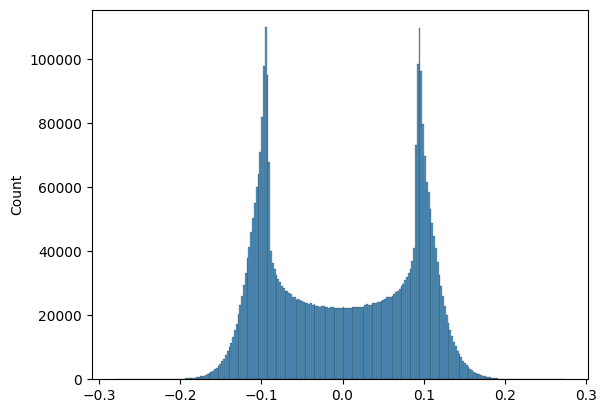

In [ ]:
sns.histplot(results.signature.ravel())

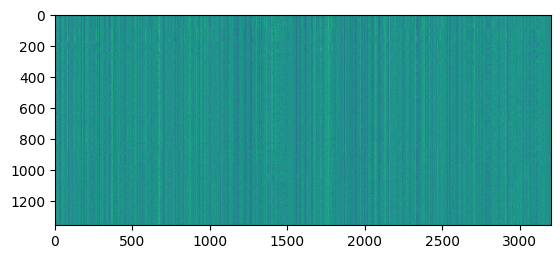

In [ ]:
plt.imshow(results.signature)

 The signatures we generated have 3200 dimensions but looking at the raw data does not inform us on how similar/different are our molecules.In Cheminformatics we often need a graphical representation of the chemical space covered by a set of molecules.  In this representation, similar molecules will be close and molecules that are different will be far apart.We can use scikit-learn to create a lower bi-dimensional representation which will enable such visualization.

Frequency plot

Text(0, 0.5, 'Frequency')

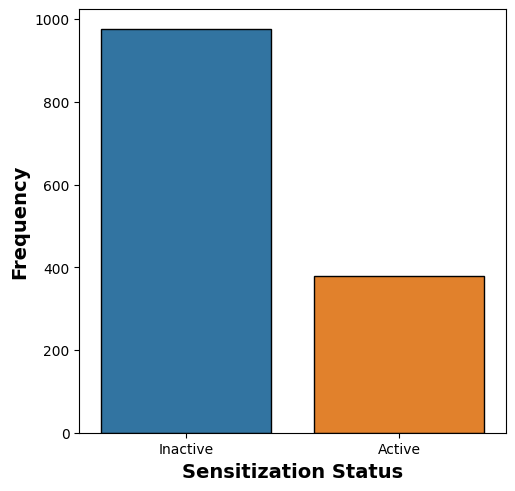

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='Sensitization Status', data=df_2, edgecolor='black')

plt.xlabel('Sensitization Status', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')


imbalanced data. Could be dealt with later

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
pca = PCA(n_components=128)
pca_red = pca.fit_transform(results.signature)
#print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))
projection = TSNE(n_components=2).fit_transform(pca_red)

0.8036772


In [ ]:
print(projection.shape)

(1355, 2)


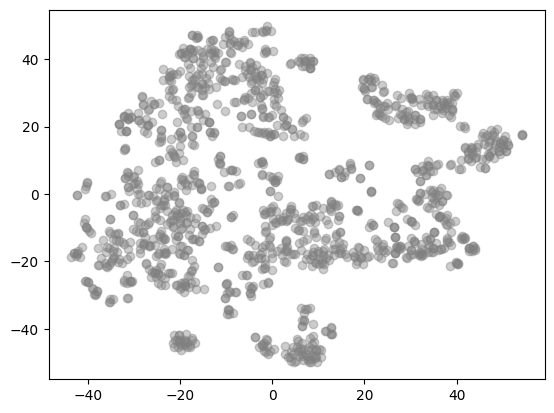

In [ ]:

plt.scatter(projection[:,0],projection[:,1], color='grey', alpha=.4)

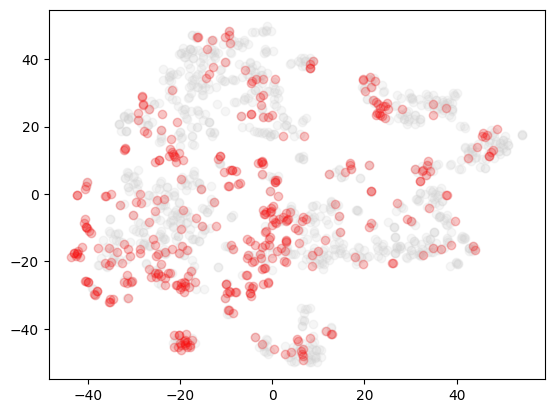

In [ ]:

cat_smiles = df_2[df_2['Sensitization Status'] == 'Active'].SMILES.unique()
cat_mask = np.isin(smiles, cat_smiles)
plt.scatter(projection[:,0],projection[:,1], color='lightgrey', alpha=.2)
plt.scatter(projection[:,0][cat_mask],projection[:,1][cat_mask], color='red', alpha=0.2)

^It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.



maybe do this for each of the 25 levels of embeddings

In [ ]:
arr1=np.array(results.signature)
all_arr=np.split(arr1,25,axis=1)

In [ ]:
projections=np.zeros([1355,2])
pca = PCA(n_components=16)
for x in range(25):
  pca_red = pca.fit_transform(all_arr[x])
  projection = TSNE(n_components=2).fit_transform(pca_red)
  projections=np.concatenate((projections,projection),axis=1)



In [ ]:
projections=projections[:,2:]
all_projections=np.split(projections,25,axis=1)
all_projections[0].shape

(1355, 2)

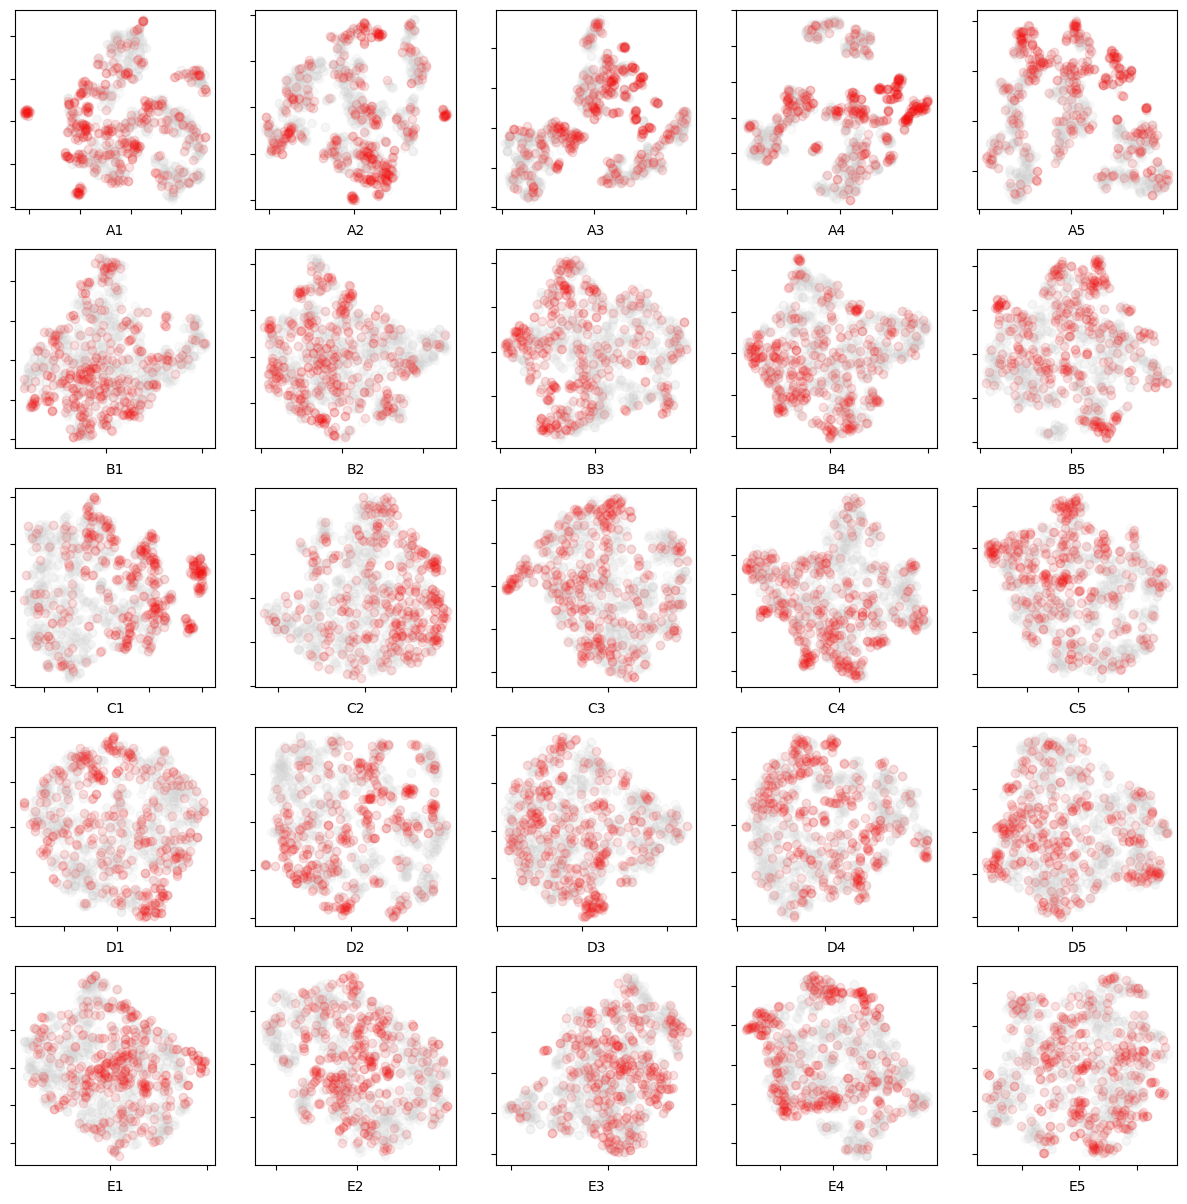

In [ ]:
rows, cols = 5, 5
rows_title=['A','B','C','D','E']
fig, axes = plt.subplots(rows, cols, figsize=(15,15))
#for the
cat_smiles = df_2[df_2['Sensitization Status'] == 'Active'].SMILES.unique()
cat_mask = np.isin(smiles, cat_smiles)
counter=0
for row in range(rows):
  for col in range(cols):

    projection=all_projections[counter]

    axes[row, col].scatter(projection[:,0],projection[:,1], color='lightgrey', alpha=.1)
    axes[row, col].scatter(projection[:,0][cat_mask],projection[:,1][cat_mask], color='red', alpha=0.1)
    lbl=rows_title[row]+str(col+1)
    axes[row, col].set_xlabel(lbl)
    axes[row, col].set_yticklabels([])
    axes[row, col].set_xticklabels([])

    counter=counter+1


In [ ]:
pca_all=np.zeros([1355,16])
pca = PCA(n_components=16)
for x in range(25):
  pca_red = pca.fit_transform(all_arr[x])
  pca_all=np.concatenate((pca_all,pca_all),axis=1)


In [ ]:
projections=projections[:,2:]
all_projections=np.split(projections,25,axis=1)
all_projections[0].shape

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=42)




rows, cols = 5, 5
rows_title=['A','B','C','D','E']
fig, axes = plt.subplots(rows, cols, figsize=(15,15))
#for the
cat_smiles = df_2[df_2['Sensitization Status'] == 'Active'].SMILES.unique()
cat_mask = np.isin(smiles, cat_smiles)
counter=0
for row in range(rows):
  for col in range(cols):

    projection=all_projections[counter]
    #predict the labels of clusters.
    label = kmeans.fit_predict(projection)
    #Getting unique labels
    u_labels = np.unique(label)


    for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
    axes[row, col].scatter(projection[:,0],projection[:,1], color='lightgrey', alpha=.1)
    axes[row, col].scatter(projection[:,0][cat_mask],projection[:,1][cat_mask], color='red', alpha=0.1)
    lbl=rows_title[row]+str(col+1)
    axes[row, col].set_xlabel(lbl)
    axes[row, col].set_yticklabels([])
    axes[row, col].set_xticklabels([])

    counter=counter+1

In [ ]:


#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

5

## Dimensionality Reduction


## Data split (80/20 ratio)

## Build a classification model

## Comparing ML algorithms